#### Etapa 1: A primeira função do algoritmo tem por objetivo extrair os pontos das coordenadas de cada cidade a partir da leitura de um arquivo .tsp.  

In [9]:
import random
import matplotlib.pyplot as plt

# Função para leitura do arquivo .tsp e separação das coordenadas em cada cidade
def ler_arquivo_tsp(Arquivo_TSP):
    cidades = []
    with open(Arquivo_TSP, 'r') as arquivo:
        lendo_cidades = False
        for linha in arquivo:
            if linha.startswith("NODE_COORD_SECTION"):
                lendo_cidades = True
                continue
            if lendo_cidades and linha.strip() != "EOF":
                partes = linha.strip().split()
                cidade_id = int(partes[0])
                x, y = float(partes[1]), float(partes[2])
                cidades.append((cidade_id, x, y))
    return cidades

#### Etapa 2: Nesta segunda etapa, elabora-se a função de inicialização de uma população, demarcada, aleatória que é utilizada como ponto de partida para o algoritmo ao reunir os diversos indivíduos que funcionarão como as primeiras soluções e representarão os valores da função objetivo.

In [10]:
import random
import matplotlib.pyplot as plt

# Função para inicializar uma população com indivíduos aleatórios
def inicializar_populacao(num_individuos, num_cidades):
    populacao = []
    for _ in range(num_individuos):
        individuo = list(range(num_cidades))
        random.shuffle(individuo)
        populacao.append(individuo)
    return populacao

#### Etapa 3: Neste passo, elabora-se uma função que permite descobrir a distância entre duas cidades por meio do cálculo da distância euclidiana e assim retornar o cálculo da distância total de cada rota.

In [11]:
import random
import matplotlib.pyplot as plt

# Função para calcular a distância total de uma rota
def calcular_distancia_rota(rota, cidades):
    distancia = 0
    for i in range(len(rota) - 1):
        cidade_atual = rota[i]
        cidade_seguinte = rota[i + 1]
        distancia += ((cidades[cidade_atual][0] - cidades[cidade_seguinte][0])**2 + (cidades[cidade_atual][1] - cidades[cidade_seguinte][1])**2) ** 0.5
    distancia += ((cidades[rota[-1]][0] - cidades[rota[0]][0])**2 +  (cidades[rota[-1]][1] - cidades[rota[0]][1])**2) ** 0.5
    return distancia

#### Etapa 4: Neste ponto, construiu-se uma função para realizar a seleção de indivíduos de maneira aleatória com o uso do método do torneio mantendo sempre os melhores (com a menor distância total de rota e automaticamente com a melhor aptidão) salvos em uma variável reservando-os para uma próxima geração.

In [12]:
import random
import matplotlib.pyplot as plt

# Função de seleção por torneio elitista
def selecao(populacao, cidades, num_selecionados):
    selecionados = []
    for _ in range(num_selecionados):
        torneio = random.sample(populacao, 20)  # Seleciona 20 indivíduos aleatoriamente
        melhor = min(torneio, key=lambda x: calcular_distancia_rota(x, cidades))
        selecionados.append(melhor)
    return selecionados

#### Etapa 5: Na quinta etapa, estabeleceu-se uma função para a realização de uma operação de crossover de genes entre os pais e os seus descendentes utilizando o operador de crossover OX. Este operador gera descendentes a partir da escolha de uma sequência parcial de cidades (para o exemplo em questão) de um dos pais preservando a sequência relativa das cidades do outro pai.

In [13]:
import random
import matplotlib.pyplot as plt

# Função para realizar o cruzamento (crossover) de dois pais para gerar filhos (descendentes)
def crossover(pai1, pai2):
    ponto_corte = random.randint(1, len(pai1) - 2)
    filho1 = pai1[:ponto_corte]
    for gene in pai2:
        if gene not in filho1:
            filho1.append(gene)
    filho2 = pai2[:ponto_corte]
    for gene in pai1:
        if gene not in filho2:
            filho2.append(gene)
    return filho1, filho2


#### Etapa 6: Na sexta etapa está a função responsável por realizar mutações aleatórias nos genes de um indivíduo. Utilizou-se uma mutação aleatória normal que sorteia duas cidades distintas de um indivíduo e é realizada a troca de posição entre essas cidades.

In [14]:
import random
import matplotlib.pyplot as plt

# Função de mutação que altera aleatoriamente os genes de um indivíduo
def mutacao(individuo):
    i, j = random.sample(range(len(individuo)), 2)
    individuo[i], individuo[j] = individuo[j], individuo[i]

#### Etapa 7: Nesta última etapa do código, definiu-se a função final de execução do algoritmo genético. Esta função utiliza todas as outras funções descritas acima e cria um laço de iterações que a partir de um parâmetro dado de gerações cria um número determinado de novas populações avaliando a qualidade das soluções apresentadas e imprimindo as melhores distâncias encontradas a cada geração. Além disso, ao final das gerações ou a partir da condição de parada determinada (dada por um número arbitrário de passagem de gerações sem melhoria no valor da função objetivo) a função se encarrega de plotar o gráfico contendo a rota percorrida pelo melhor caminho encontrado, o gráfico que representa o valor da aptidão das soluções (representada pela minimização do custo total) com o passar das gerações e os resultado final de melhor rota encontrada e sua distância.

In [15]:
import random
import matplotlib.pyplot as plt

def algoritmo_genetico(num_geracoes, tamanho_populacao, taxa_mutacao, arquivo_tsp, num_geracoes_sem_melhoria):
    cidades = ler_arquivo_tsp(arquivo_tsp)
    num_cidades = len(cidades)
    populacao = inicializar_populacao(tamanho_populacao, num_cidades)
    
    melhor_distancia_atual = float('inf')  # Melhor distância encontrada até agora
    geracoes_sem_melhoria = 0  # Contador de gerações sem melhoria

    # Listas para armazenar dados para plotagem
    melhores_distancias = []
    medias_distancias = []

    for geracao in range(num_geracoes):
        populacao = selecao(populacao, cidades, tamanho_populacao)
        nova_populacao = []

        while len(nova_populacao) < tamanho_populacao:
            pai1, pai2 = random.sample(populacao, 2)
            filho1, filho2 = crossover(pai1, pai2)
            if random.random() < taxa_mutacao:
                mutacao(filho1)
            if random.random() < taxa_mutacao:
                mutacao(filho2)
            nova_populacao.extend([filho1, filho2])

        populacao = nova_populacao

        melhor_individuo = min(populacao, key=lambda x: calcular_distancia_rota(x, cidades))
        melhor_distancia = calcular_distancia_rota(melhor_individuo, cidades)

        print(f"Geração {geracao + 1}: Melhor Distância = {melhor_distancia}")

        # Armazena dados para plotagem
        melhores_distancias.append(melhor_distancia)
        media_distancias = sum(calcular_distancia_rota(individuo, cidades) for individuo in populacao) / tamanho_populacao
        medias_distancias.append(media_distancias)

        # Verifica se houve melhoria na melhor distância
        if melhor_distancia < melhor_distancia_atual:
            melhor_distancia_atual = melhor_distancia
            geracoes_sem_melhoria = 0
        else:
            geracoes_sem_melhoria += 1

        # Condição de parada: se não houver melhoria por um número específico de gerações
        if geracoes_sem_melhoria >= num_geracoes_sem_melhoria:
            break

    # Plotagem da evolução da função de aptidão
    geracoes = list(range(len(melhores_distancias)))
    plt.figure(figsize=(10, 6))
    plt.plot(geracoes, melhores_distancias, label="Melhor Distância")
    plt.plot(geracoes, medias_distancias, label="Distância Média")
    plt.xlabel("Geração")
    plt.ylabel("Distância")
    plt.legend()
    plt.title("Evolução da Função de Aptidão")
    plt.grid(True)
    plt.show()

    # Plotagem dos pontos da solução final encontrada
    plt.figure(figsize=(10, 6))
    x = [cidades[i][1] for i in melhor_individuo]
    y = [cidades[i][2] for i in melhor_individuo]
    x.append(x[0])  # Volte para a primeira cidade para formar um ciclo
    y.append(y[0])
    plt.plot(x, y, marker='o')
    plt.title("Solução Final Encontrada")
    plt.grid(True)
    plt.show()

    return melhor_individuo, melhor_distancia

Geração 1: Melhor Distância = 5521.3926870728765
Geração 2: Melhor Distância = 5298.85608624402
Geração 3: Melhor Distância = 5261.04474089994
Geração 4: Melhor Distância = 5031.601580700759
Geração 5: Melhor Distância = 4871.149880034502
Geração 6: Melhor Distância = 4680.346034650402
Geração 7: Melhor Distância = 4575.142505342926
Geração 8: Melhor Distância = 4381.409872363305
Geração 9: Melhor Distância = 4299.954274704803
Geração 10: Melhor Distância = 4209.210266400805
Geração 11: Melhor Distância = 4139.78299576579
Geração 12: Melhor Distância = 4061.9267736820993
Geração 13: Melhor Distância = 4052.39064544561
Geração 14: Melhor Distância = 3976.0389958007277
Geração 15: Melhor Distância = 3942.5225951847437
Geração 16: Melhor Distância = 3883.2032427302593
Geração 17: Melhor Distância = 3863.4153959555942
Geração 18: Melhor Distância = 3802.9474441252537
Geração 19: Melhor Distância = 3761.213704446691
Geração 20: Melhor Distância = 3701.806233769199
Geração 21: Melhor Distânc

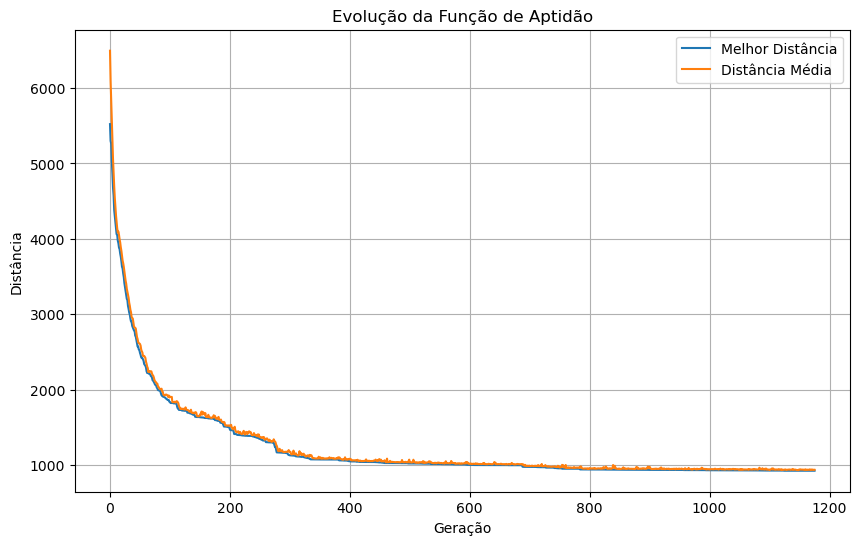

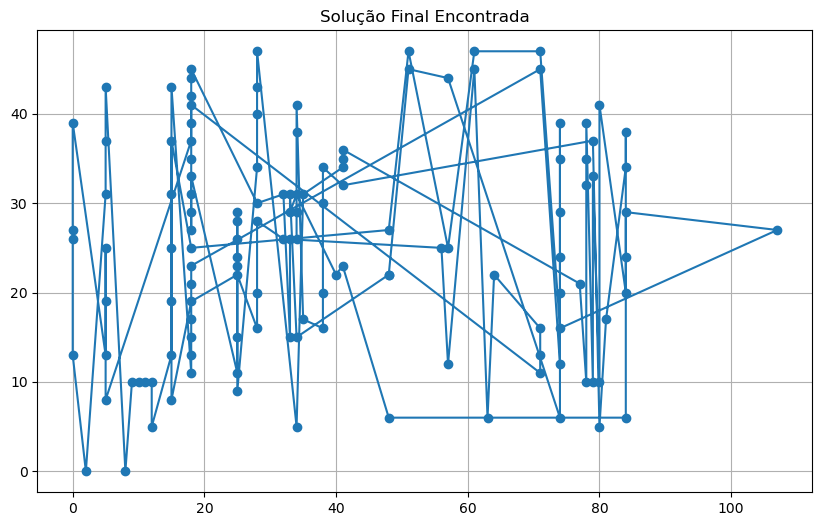

Melhor Rota Encontrada: [86, 89, 94, 111, 110, 109, 108, 107, 106, 104, 102, 31, 30, 28, 27, 26, 25, 23, 24, 29, 46, 53, 54, 55, 61, 91, 92, 95, 97, 98, 101, 100, 99, 40, 37, 33, 34, 35, 36, 44, 45, 47, 48, 49, 50, 51, 52, 57, 58, 59, 60, 73, 75, 83, 84, 85, 112, 113, 114, 115, 116, 117, 118, 120, 121, 124, 125, 126, 130, 105, 103, 96, 93, 90, 87, 32, 22, 20, 19, 21, 18, 17, 16, 15, 14, 13, 12, 10, 9, 8, 4, 0, 1, 2, 3, 5, 6, 7, 11, 38, 39, 41, 42, 43, 56, 62, 63, 64, 68, 69, 71, 72, 74, 76, 77, 78, 79, 82, 119, 122, 123, 127, 128, 129, 88, 81, 80, 70, 65, 66, 67]
Melhor Distância Encontrada: 925.3759556733163


In [16]:
import random
import matplotlib.pyplot as plt

# Parâmetros do algoritmo
# Tamanho do torneio é dado na própria função. Para o exemplo e resultado apresentados foi utilizado um tamanho = 20 indivíduos
num_geracoes = 1500
tamanho_populacao = 500
taxa_mutacao = 0.07
arquivo_tsp = "Arquivo_TSP.tsp"
num_geracoes_sem_melhoria = 50  # Número de gerações sem melhoria para parar

# Executa o algoritmo genético
melhor_rota, melhor_distancia = algoritmo_genetico(num_geracoes, tamanho_populacao, taxa_mutacao, arquivo_tsp, num_geracoes_sem_melhoria)
print(f"Melhor Rota Encontrada: {melhor_rota}")
print(f"Melhor Distância Encontrada: {melhor_distancia}")